In [0]:
from IPython.display import HTML
from base64 import b64encode

#### helper for showing drive file

In [0]:
def getv(video):
    mp4 = open(video,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=500 autoplay loop>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

**Deep Learning, to a large extent, is really about solving massive nasty optimization problems.**

# Intro to optimization in deep learning


1.   Gradient Descent
2.   Stochastic Gradient Descent
3.   Momentum
4.   Adagrad
5.   RMSPROP
6.   ADAM

![alt text](https://mlfromscratch.com/content/images/2019/12/saddle.gif)



---



Tensorflow gives us quite a few options for picking a gradient descent based optimization strategy. This is what causes our neural network to actually learn from data. But it is not immediately clear how we should pick one.
Once we understand the underlying details,  of the most popular ones,
it will become much more clearer.


In [3]:
getv('/content/drive/My Drive/courses/Advance Machine Learning/resources/grad desc 1.mp4')

In [4]:
getv('/content/drive/My Drive/courses/Advance Machine Learning/resources/grad desc2.mp4')

<img src="https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif" width="600">

# better explanation

![alt text](https://mlfromscratch.com/content/images/2019/12/gradient-descent-optimized--1-.gif)



In practice, we might never exactly reach the minima, but we keep oscillating in a flat region in close vicinity of the minima. As we oscillate our this region, the loss is almost the minimum we can achieve, and doesn't change much as we just keep bouncing around the actual minimum. Often, we stop our iterations when the loss values haven't improved in a pre-decided number, say, 10, or 20 iterations. When such a thing happens, we say our training has converged, or convergence has taken place.
![alt text](https://blog.paperspace.com/content/images/2018/05/fastlr.png)

If you were to ask what the most important machine-learning technique is, the answer is without a doubt gradient descent. It is the foundation of how we train intelligent systems. And it's based off a very simple idea :

# Challenges with Gradient Descent #1: **Local Minima**![alt text](https://blog.paperspace.com/content/images/2018/05/challenges-1.png)

For example, the following contour is a constructed 3-D representation for loss contour of a VGG-56 deep network's loss function on the **CIFAR-10 dataset**.

<img width="500" src="https://blog.paperspace.com/content/images/2018/05/noshort.png">

As you can see, the loss landscape is ridden with local minimum.

# Stochastic Gradient descent
- Traditional gradient descent computes the
gradients of the loss function with regards to the parameters for
the entire training data set for a given number
of epochs. 

- Since we need to calculate the gradients for the whole data set, for just a single update this is relatively slow and even intractible for data sets
that do not fit in memory. 

- So to get around this intractibility, we can use stochastic gradient descent.
This is where we perform a parameter update for each training example and label. 

- So we just add a loop over our training data points and calculate
the gradient with regards to each and every one. These more frequent updates with high variance  cause the objective function to fluctuate more intensely.

- This is a good thing in that it helps it jump to new and possibly better local minima. Where with standard gradient descent will only converge to the minimum of the base in, where the parameters are placed in.

- But it also complicates convergence to the exact minimum since it could keep overshooting. 

- So an improvement would be to use mini-batch gradient descent, as it takes the best of both worlds by performing an update for every subset of training examples that we can decide the size of. 

Training in mini-batches is usually the method of choice for training neural networks and we usually use the term stochastic gradient descent even when mini-batches are used.

In [5]:
getv('/content/drive/My Drive/courses/Advance Machine Learning/resources/stoc grad desc1.mp4')

# Momentum
[best visualization](https://distill.pub/2017/momentum/)


The oscillations in plane old SGD make it hard to reach convergence though.

So a technique called **momentum** was invented that lets it navigate along the relevant directions and softens the oscillations in the era of interactions.

<img src="https://mlfromscratch.com/content/images/2019/12/no-momentum.gif" width="600">
<img src="https://mlfromscratch.com/content/images/2019/12/momentum.gif" width="600">
- All it does is it adds a fraction of the direction or update vector of the previous step to the current step which amplifies the speed in the correct direction.
- It is just like momentum from classical physics. Thanks Isaac Newton.
When a ball is pushed down a hill, it accumulates momentum, meaning it becomes faster and faster.
- In the same way our momentum term increases for dimensions whose gradients point in the same direction, and reduces updates for dimensions whose gradients change direction. 
- This means 
    1.  Faster convergence and 
    2.  Reduced oscillations

![alt text](https://mlfromscratch.com/content/images/2019/12/increasing-momentum.gif)

In [6]:
getv('/content/drive/My Drive/courses/Advance Machine Learning/resources/momentum.mp4')

Output hidden; open in https://colab.research.google.com to view.

**Cons**

As the ball accelerates down the hill, how do we know that we don't miss the local minima? 

If the momentum is too much, we will most likely miss the local minima, rolling past it, but then rolling backwards, missing it again. 

If the momentum is too much, we could just swing back and forward between the local minima.

# Adaptive Learning Rate
An adaptive learning rate can be observed in AdaGrad, AdaDelta, RMSprop and Adam, but I will only go into AdaGrad and RMSprop, as they seem to be the relevant one's (although AdaDelta has the same update rule as RMSprop)

## Adagrad

AdaGrad does. It stands
for adaptive gradient and allows the learning rate to
adapt based on the parameters. So it makes
big updates for infrequent parameters and small updates
for frequent parameters. 

It uses a different learning rate for every
parameter at a given time step based on the past gradients
that were computed for that parameter. This means that we
do not have to manually tune the learning rate. 

**Cons**

Its main weakness though is that the learning rate is always decreasing.
Since the accumulation of squared gradients
in the denominator grows because each added
term is always positive. At some point
the learning rate could get so small that the model just
stops learning entirely



`Overview of how the sum grows, as t gets larger.`


<img src="https://mlfromscratch.com/content/images/2019/12/sum-gradients.png" width="500">

## RMSprop
Root Mean Squared Propagation (RMSprop) is very close to Adagrad, except for it does not provide the sum of the gradients, but instead an exponentially decaying average. This decaying average is realized through combining the Momentum algorithm and Adagrad algorithm, with a new term.

An important property of RMSprop is that we are not restricted to just the sum of the past gradients, but instead we are more restricted to gradients for the recent time steps. 

This means that RMSprop changes the learning rate slower than Adagrad, but still reaps the benefits of converging relatively fast 

![alt text](https://mlfromscratch.com/content/images/2019/12/rmsprop.gif)

With the AdaGrad algorithm, the learning rate 
η
 was monotonously decreasing, while in RMSprop, 
η
 can adapt up and down in value, as we step further down the hill for each epoch. This concludes adaptive learning rate, where we explored two ways of making the learning rate adapt over time. This property of adaptive learning rate is also in the Adam optimizer, and you will probably find that Adam is easy to understand


##  Adam
Adaptive Moment Estimation (Adam) is the next optimizer, and probably also the optimizer that performs the best on average. Taking a big step forward from the SGD algorithm to explain Adam does require some explanation of some clever techniques from other algorithms adopted in Adam, as well as the unique approaches Adam brings.

Adam uses Momentum and Adaptive Learning Rates to converge faster. We have already explored what Momentum means, now we are going to explore what adaptive learning rates means.

<img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" width="700">

[innovations in adam](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

# lets code

### Optimize the Beale Function using tf.train.Optimizer
![alt text](http://infinity77.net/global_optimization/_images/Beale.png))

### import required packages

In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
import plotly.express as px
import seaborn
import random
from scipy import stats
from scipy.optimize import fmin
import os
import time
from IPython.display import HTML
from itertools import zip_longest
%tensorflow_version 2.x
import tensorflow as tf
seaborn.set() # default plot styling

TensorFlow 2.x selected.


### Define the Beale function

In [0]:

def f(x, y):
  return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [9]:
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
print("minima (1x2 row vector shape):\n {}".format(minima))
print("minima (2x1 column vector shape):")
print(minima_)

minima (1x2 row vector shape):
 [3.  0.5]
minima (2x1 column vector shape):
[[3. ]
 [0.5]]


### Create various optimizers

In [0]:
sgd = tf.compat.v1.train.GradientDescentOptimizer(0.01)
momentum = tf.compat.v1.train.MomentumOptimizer(0.005, momentum=0.5, use_nesterov=False)
nesterov = tf.compat.v1.train.MomentumOptimizer(0.005, momentum=0.5, use_nesterov=True)
adagrad = tf.compat.v1.train.AdagradOptimizer(0.1)
rmsprop = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.1, decay=0.9, epsilon=1e-10)
adam = tf.compat.v1.train.AdamOptimizer(learning_rate=0.3, beta1=0.9, beta2=0.999, epsilon=1e-8)

optimizers = [sgd, momentum, nesterov, adagrad, rmsprop, adam]
opt_names = ['sgd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']

### train

In [11]:
all_pathes = []
for opt, name in zip(optimizers, opt_names):
  x_init = 0.8
  x = tf.compat.v1.get_variable('x', dtype=tf.float32, initializer=tf.constant(x_init))
  y_init = 1.6
  y = tf.compat.v1.get_variable('y', dtype=tf.float32, initializer=tf.constant(y_init))

  #print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(0, f(x, y).numpy(), x.numpy(), y.numpy()))
  x_history = []
  y_history = []
  z_prev = 0.0
  max_steps = 100
  for step in range(max_steps):
    with tf.GradientTape() as g:
      #g.watch([x, y])
      z = f(x, y)
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    dz_dx, dz_dy = g.gradient(z, [x, y])
    opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))

    #if (step+1) % 100 == 0:
    #  print("steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}  dx: {:.5f}  dy: {:.5f}".format(step+1, f(x, y).numpy(), x.numpy(), y.numpy(), dz_dx.numpy(), dz_dy.numpy()))
      
    if np.abs(z_prev - z.numpy()) < 1e-6:
      break
    z_prev = z.numpy()
  print("{} training done!".format(name))
  print("  steps: {}  z: {:.6f}  x: {:.5f}  y: {:.5f}".format(step+1, f(x, y).numpy(), x.numpy(), y.numpy()))
      
  x_history = np.array(x_history)
  y_history = np.array(y_history)
  path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
  all_pathes.append(path)

sgd training done!
  steps: 100  z: 0.098490  x: 2.44081  y: 0.32173
momentum training done!
  steps: 100  z: 0.098808  x: 2.44014  y: 0.32149
nesterov training done!
  steps: 100  z: 0.098496  x: 2.44079  y: 0.32173
adagrad training done!
  steps: 100  z: 10.390488  x: 0.59005  y: 0.68061
rmsprop training done!
  steps: 100  z: 0.015740  x: 2.79879  y: 0.46634
adam training done!
  steps: 100  z: 0.004150  x: 2.87197  y: 0.47409


### visualize static

In [0]:
number_of_points = 50
margin = 4.5
x_min = 0. - margin
x_max = 0. + margin
y_min = 0. - margin
y_max = 0. + margin
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

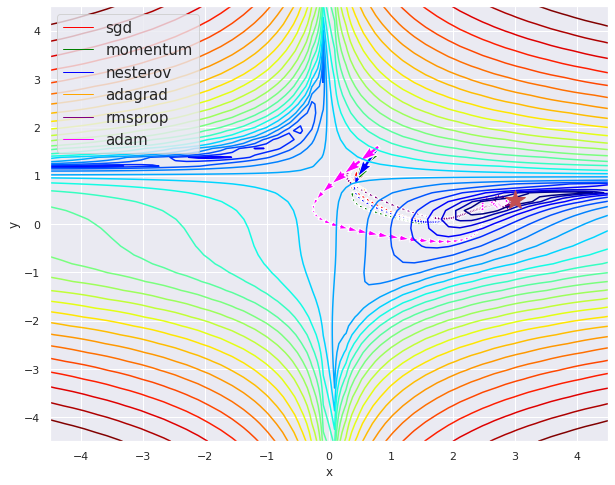

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'magenta']
for name, path, color in zip(opt_names, all_pathes, colors):
  ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
            scale_units='xy', angles='xy', scale=1, color=color, lw=1)
  ax.plot([], [], color=color, label=name, lw=1)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

ax.legend(loc='upper left', prop={'size': 15})

plt.savefig('allplot.png', dpi=150, quality=100)
plt.show()

### Animation (crazy code)

In [0]:
class TrajectoryAnimation(animation.FuncAnimation):
  def __init__(self, *paths, labels=[], colors=[], fig=None, ax=None, frames=None, 
               interval=60, repeat_delay=5, blit=True, **kwargs):
    if fig is None:
      if ax is None:
        fig, ax = plt.subplots()
      else:
        fig = ax.get_figure()
    else:
      if ax is None:
        ax = fig.gca()

    self.fig = fig
    self.ax = ax

    self.paths = paths

    if frames is None:
      frames = max(path.shape[1] for path in paths)

    self.lines = [ax.plot([], [], label=label, color=color, lw=3)[0] 
                  for _, label, color in zip_longest(paths, labels, colors)]
    self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                   for line in self.lines]

    super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                              frames=frames, interval=interval, blit=blit,
                                              repeat_delay=repeat_delay, **kwargs)

  def init_anim(self):
    for line, point in zip(self.lines, self.points):
      line.set_data([], [])
      point.set_data([], [])
    return self.lines + self.points

  def animate(self, i):
    for line, point, path in zip(self.lines, self.points, self.paths):
      line.set_data(*path[::,:i])
      point.set_data(*path[::,i-1:i])
    return self.lines + self.points

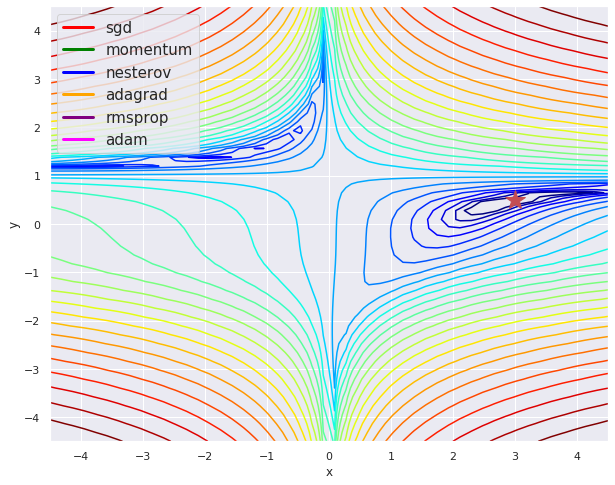

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima, 'r*', markersize=20)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

path_animation = TrajectoryAnimation(*all_pathes, labels=opt_names, colors=colors, ax=ax)

ax.legend(loc='upper left', prop={'size': 15})

In [16]:
HTML(path_animation.to_html5_video())

In [0]:
path_animation.save('allplot.animation.mp4')

# Keep working [visit](https://ruder.io/optimizing-gradient-descent/)